Natural Language Processing - Final Project

As the main dataset for the task of text classification was chosen: IMDB 50K Movie Reviews - https://www.kaggle.com/datasets/atulanandjha/imdb-50k-movie-reviews-test-your-bert

The objective of this project is to implement text classification models and demonstrate their work using the example of film review sentiment classification. So, the task is to classify the feedback left by the user and determine the mood: negative or positive

In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
os.chdir(r"C:\Users\Admin\Natural Language Processing Final Project")
print(os.getcwd())

C:\Users\Admin\Natural Language Processing Final Project


In [3]:
dir = "data/"
train_csv = os.path.join(dir, "train.csv")
test_csv  = os.path.join(dir, "test.csv")

In [4]:
test_df = pd.read_csv(test_csv, encoding='utf-8')
train_df = pd.read_csv(train_csv, encoding='utf-8')

test_df['sentiment'] = test_df['sentiment'].map({'pos': 1, 'neg': 0})
train_df['sentiment'] = train_df['sentiment'].map({'pos': 1, 'neg': 0})

print(train_df.shape)
train_df.head()

(25000, 2)


,text,sentiment
0,"Now, I won't deny that when I purchased this o...",0
1,"The saddest thing about this ""tribute"" is that...",0
2,Last night I decided to watch the prequel or s...,0
3,I have to admit that i liked the first half of...,0
4,I was not impressed about this film especially...,0


In [5]:
print(test_df.shape)
test_df.head()

(25000, 2)


,text,sentiment
0,"My daughter liked it but I was aghast, that a ...",0
1,I... No words. No words can describe this. I w...,0
2,this film is basically a poor take on the old ...,0
3,"This is a terrible movie, and I'm not even sur...",0
4,First of all this movie is a piece of reality ...,1


In [6]:
print('Train DF')
print(train_df.isna().sum())
print(train_df.duplicated().sum())
print('\n')
print('Test DF')
print(test_df.isna().sum())
print(test_df.duplicated().sum())

Train DF
text         0
sentiment    0
dtype: int64
96


Test DF
text         0
sentiment    0
dtype: int64
199


In [7]:
train_df = train_df.drop_duplicates(subset='text')
print(train_df.duplicated().sum())
test_df = test_df.drop_duplicates(subset='text')
print(test_df.duplicated().sum())

0
0


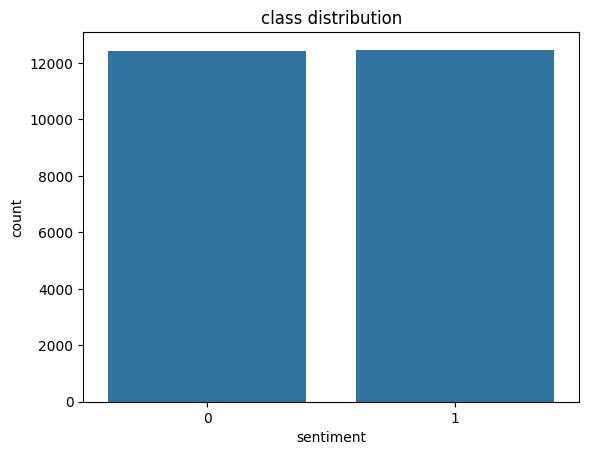

In [8]:
sns.countplot(x="sentiment", data=train_df)

plt.title("class distribution")
plt.show()

STAGE I

In [9]:
from src.preprocessing import preprocess_custom
from src.models import train_random_forest

In [10]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
train_df['text'] = preprocess_custom(train_df['text'])
test_df['text'] = preprocess_custom(test_df['text'])

In [12]:
train_df.head(3)

,text,sentiment
0,wont deny purchased ebay high expectation incr...,0
1,saddest thing tribute almost singer including ...,0
2,last night decided watch prequel shall say cal...,0


In [13]:
test_df.head(3)

,text,sentiment
0,daughter liked aghast character movie smoke is...,0
1,word word describe try sake brave people stick...,0
2,film basically poor take old urban legend baby...,0


In [25]:
tfidf = TfidfVectorizer(max_features=5000)

X_tfidf = tfidf.fit_transform(train_df['text'])

In [26]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_tfidf, train_df['sentiment'], test_size=0.2, random_state=42)

In [27]:
rf_model = train_random_forest(X_train_1, y_train_1)

In [28]:
y_pred1 = rf_model.predict(X_test_1)
accuracy1 = accuracy_score(y_test_1, y_pred1)
conf_matrix1 = confusion_matrix(y_test_1, y_pred1)

In [29]:
print(accuracy1)
print(conf_matrix1)

0.8357759486046978
[[2046  387]
 [ 431 2117]]


STAGE II

Keras Embeddings with 1D Convolution

In [30]:
from src.preprocessing import tokengen
from src.models import create_conv1d_model

texts = train_df['text'].astype(str).tolist()
labels = train_df['sentiment'].astype(int).tolist()

tokenizer, padded = tokengen(texts)

In [31]:
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(padded, labels, test_size=0.2, random_state=42)

In [32]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128
max_len = 200

In [33]:
model2 = create_conv1d_model(vocab_size, embedding_dim, max_len)

In [34]:
y_train_2 = np.array(y_train_2)
y_val_2 = np.array(y_val_2)

In [ ]:
history = model2.fit(X_train_2, y_train_2, epochs=5, batch_size=64, validation_data=(X_val_2, y_val_2))

Epoch 1/5


312/312 [==============================] - 34s 108ms/step - loss: 0.4379 - accuracy: 0.7770 - val_loss: 0.2920 - val_accuracy: 0.8805
Epoch 2/5
312/312 [==============================] - 33s 106ms/step - loss: 0.1696 - accuracy: 0.9392 - val_loss: 0.3072 - val_accuracy: 0.8826
Epoch 3/5
253/312 [=======================>......] - ETA: 6s - loss: 0.0594 - accuracy: 0.9823

In [ ]:
_, accuracy2 = model2.evaluate(X_val_2, y_val_2)
y_pred2 = model2.predict(X_val_2)
y_pred2_classes = (y_pred > 0.5).astype(int) if len(set(y)) == 2 else y_pred.argmax(axis=1)
conf_matrix2 = confusion_matrix(y_test, y_pred_classes)

Word2Vec Embedding with LSTM

STAGE III